# Group Project Proposal

### Introduction

In school, the way used to measure a student’s knowledge is often through exams. To do well on exams, students often resort to spending as much time as possible to study in preparation for them. We want to investigate whether study time and exam results have an impact on a person’s knowledge level of that subject.

**The question we are trying to answer is: based on the time they spend studying and exam performance, what knowledge level would the user have on a subject?**

We are using the [User Knowledge Modeling](https://archive.ics.uci.edu/dataset/257/user+knowledge+modeling) dataset from the UCI Machine Learning Repository. There 403 observations which have been already split – 258 in the training dataset, and 145 in the testing set. The set contains no missing values. The dataset contains the following columns, in the order of left to right:

- user’s degree of study time for the goal subject materials (STG)
- user's the degree of repetition for studying the goal subject materials (SCG)
- user’s degree of study time for related subjects (STR)
- user's exam performance for related subjects (LPR)
- user's exam performance for the goal subject (PEG)
- user's knowledge level (UNS)-- classified as very low, low, middle, or high. 

Aside from UNS which indicates the knowledge level of users, the other columns are all dbl variables.


### Preliminary Exploratory Data Analysis

In [2]:
library(tidyverse) #loading packages
library(repr)
library(rvest)
library(stringr)
library(readxl)
library(dplyr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recip

### Reading and Tidying Data

In [3]:
# reading data from url into jupyter

training_data <- read_csv("https://raw.githubusercontent.com/thisisyifulin/group_project-group34-/main/Training_Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.csv") |>
select(STG, SCG, STR, LPR, PEG, UNS)

testing_data <- read_csv("https://raw.githubusercontent.com/thisisyifulin/group_project-group34-/main/Test_Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.csv")

training_data
testing_data 

New names:
• `` -> `...7`
• `` -> `...8`
Rows: 258 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): UNS, Attribute Information:
dbl (5): STG, SCG, STR, LPR, PEG
lgl (2): ...7, ...8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 145 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): UNS
dbl (5): STG, SCG, STR, LPR, PEG

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,High
0.50,0.75,0.81,0.61,0.26,Middle
0.66,0.90,0.76,0.87,0.74,High


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.10,0.50,0.26,0.05,Very Low
0.05,0.05,0.55,0.60,0.14,Low
0.08,0.18,0.63,0.60,0.85,High
⋮,⋮,⋮,⋮,⋮,⋮
0.56,0.60,0.77,0.13,0.32,Low
0.66,0.68,0.81,0.57,0.57,Middle
0.68,0.64,0.79,0.97,0.24,Middle


In [4]:
# data is already tidy

### Summarizing the Data

In [5]:
#count the amount of each class of UNS

counts_class <- training_data |>
                group_by(UNS) |>
                summarize(count_class = n())
counts_class

UNS,count_class
<chr>,<int>
High,63
Low,83
Middle,88
very_low,24


In [6]:
#finds the mean of predictors

select_training_data <- training_data |>
select(STG, STR, LPR, PEG, UNS) # selecting the variables


predictor_means <- select_training_data |>
                   summarize(across(STG:PEG, mean, na.rm = TRUE))

predictor_means

#count the number of cells with na and renamed it into column count_ca
data_count_na <- summarize(select_training_data, count_na = sum(is.na(select_training_data)))
data_count_na

#since there are no n/a, there are no rows with n/a

Warning message:
“There was 1 warning in `summarize()`.
ℹ In argument: `across(STG:PEG, mean, na.rm = TRUE)`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))”


STG,STR,LPR,PEG
<dbl>,<dbl>,<dbl>,<dbl>
0.3711473,0.4680039,0.4327132,0.4585388


count_na
<int>
0


In [7]:
#table which summarizes the data

wider_counts_class <- counts_class |>
                pivot_wider(names_from = UNS,
                            values_from = count_class)

merge_data_inf <- 
        cbind(predictor_means, wider_counts_class, data_count_na)

merge_data_inf <- merge_data_inf %>% rename(UNS_High = High, UNS_Low = Low, UNS_Middle = Middle, UNS_Very_Low = very_low)
merge_data_inf

STG,STR,LPR,PEG,UNS_High,UNS_Low,UNS_Middle,UNS_Very_Low,count_na
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
0.3711473,0.4680039,0.4327132,0.4585388,63,83,88,24,0


In [13]:
mean_estimates<-training_data|>
group_by(UNS)|>
summarize(mean_STG=mean(STG),
          mean_TEG=mean(PEG),
          sd_STG=sd(STG),
          sd_TEG=sd(PEG))

mean_estimates

UNS,mean_STG,mean_TEG,sd_STG,sd_TEG
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
High,0.4216508,0.77253968,0.2396612,0.10756796
Low,0.3211446,0.23762651,0.1739915,0.07299193
Middle,0.3999773,0.54238636,0.2135850,0.12621815
very_low,0.3057917,0.09083333,0.1872919,0.05633106


### Exploratory Data Analysis -- Visualizations

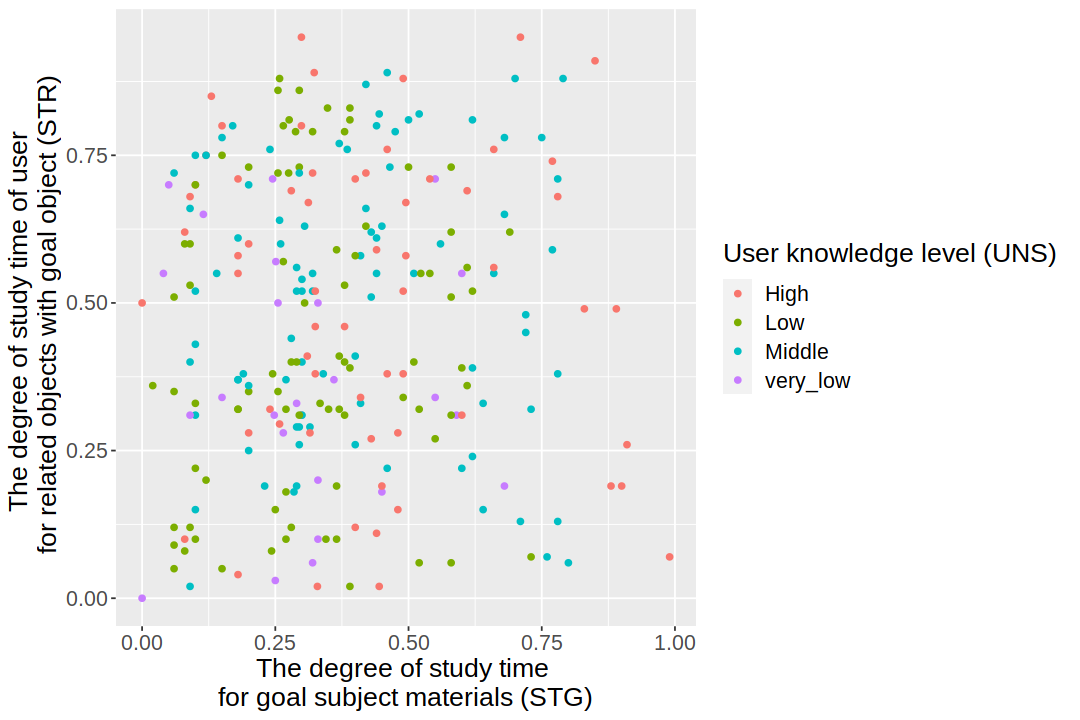

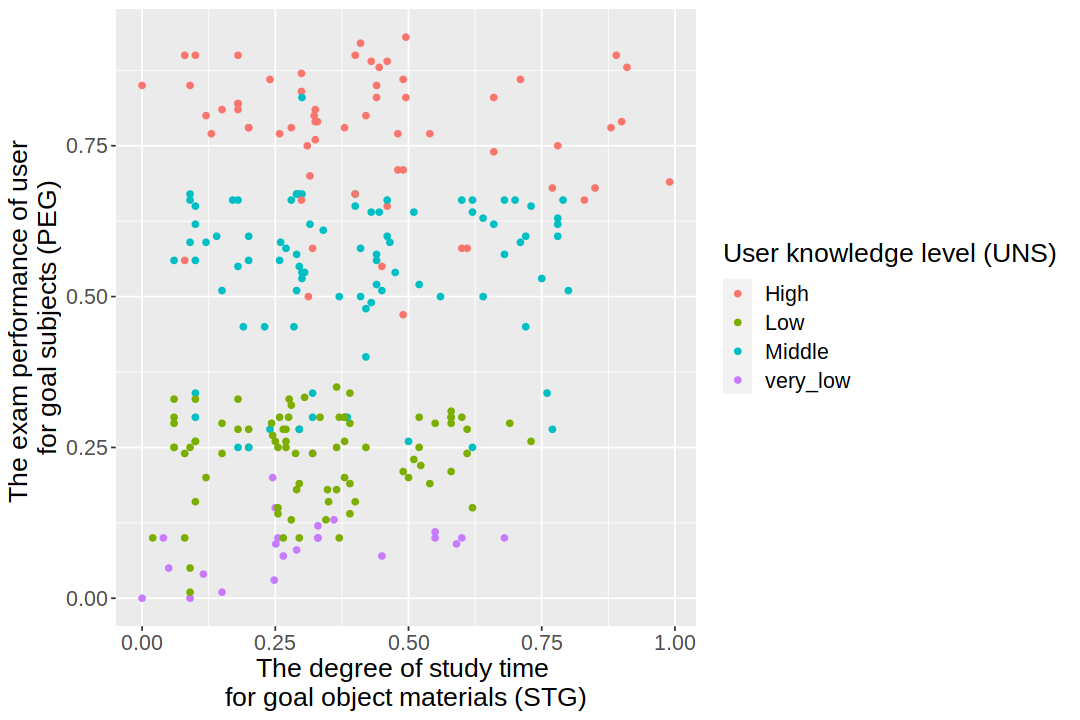

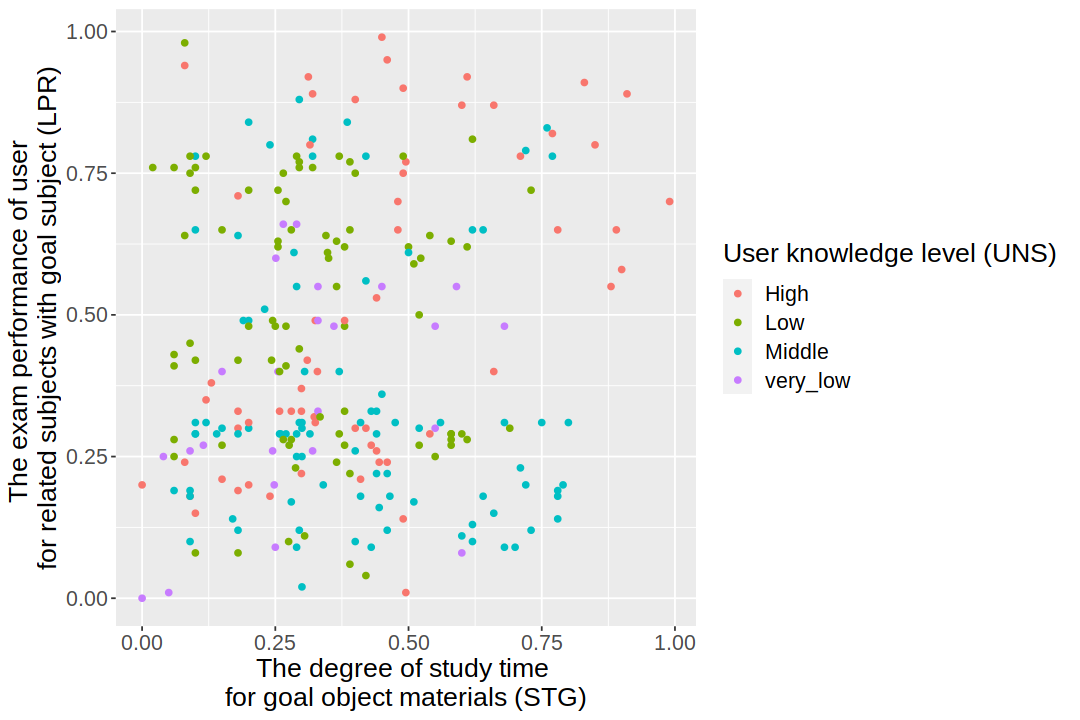

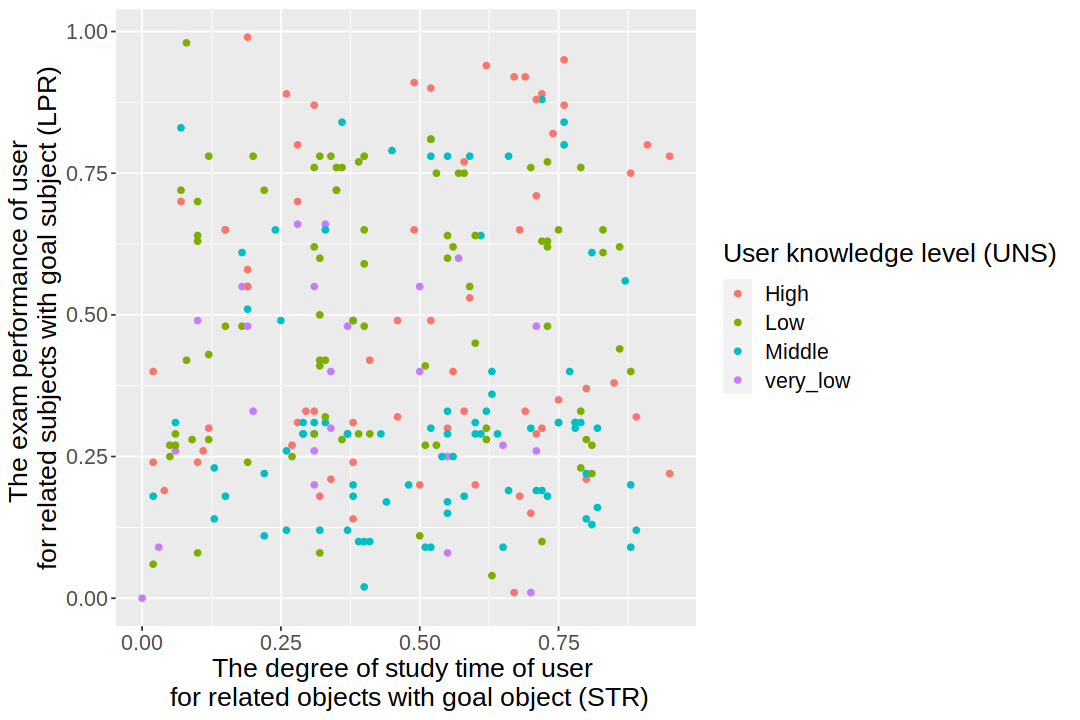

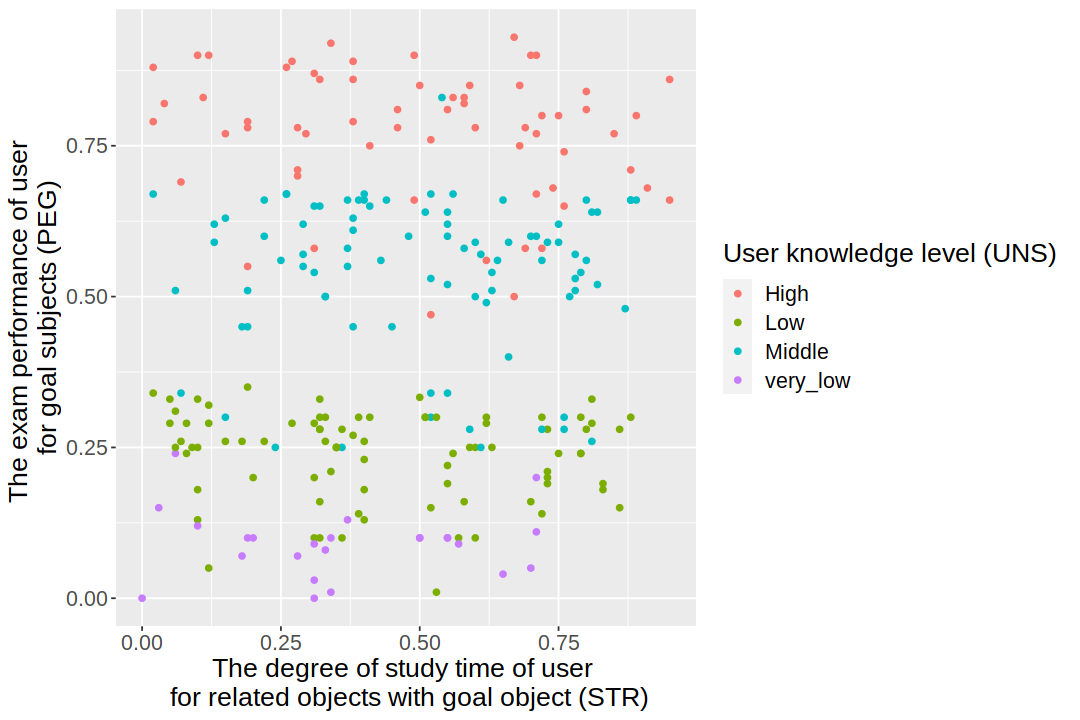

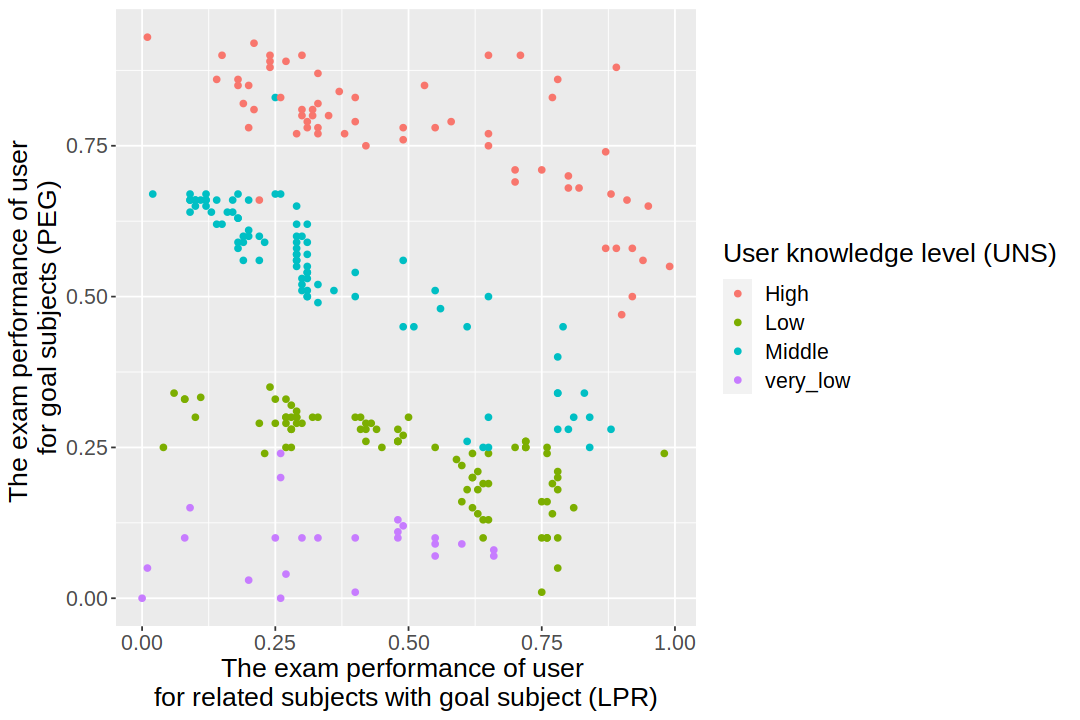

In [32]:
#data visualizations of the distributions of different variables


options(repr.plot.width = 9, repr.plot.height = 6)

stg_str_plot <- select_training_data |>
    ggplot(aes(x = STG, 
               y = STR, 
               colour = UNS)) +
        geom_point() +
        labs(x = "The degree of study time \nfor goal subject materials (STG)",
             y = "The degree of study time of user \n for related objects with goal object (STR)",
            colour = "User knowledge level (UNS)") +
        theme(text = element_text(size = 16))
 
stg_peg_plot <- select_training_data |>
    ggplot(aes(x = STG, 
               y = PEG, 
               colour = UNS)) +
        geom_point() +
        labs(x = "The degree of study time \nfor goal object materials (STG)",
             y = "The exam performance of user \nfor goal subjects (PEG)",
            colour = "User knowledge level (UNS)") +
        theme(text = element_text(size = 16))

stg_lpr_plot <- select_training_data |>
    ggplot(aes(x = STG, 
               y = LPR, 
               colour = UNS)) +
        geom_point() +
        labs(x = "The degree of study time \nfor goal object materials (STG)",
             y = "The exam performance of user \nfor related subjects with goal subject (LPR)",
            colour = "User knowledge level (UNS)") +
        theme(text = element_text(size = 16))

str_lpr_plot <- select_training_data |>
    ggplot(aes(x = STR, 
               y = LPR, 
               colour = UNS)) +
        geom_point() +
        labs(x = "The degree of study time of user \n for related objects with goal object (STR)",
             y = "The exam performance of user \nfor related subjects with goal subject (LPR)",
            colour = "User knowledge level (UNS)") +
        theme(text = element_text(size = 16))

 
str_peg_plot <- select_training_data |>
    ggplot(aes(x = STR, 
               y = PEG, 
               colour = UNS)) +
        geom_point() +
        labs(x = "The degree of study time of user \n for related objects with goal object (STR)",
             y = "The exam performance of user \nfor goal subjects (PEG)",
            colour = "User knowledge level (UNS)") +
        theme(text = element_text(size = 16))


lpr_peg_plot <- select_training_data |>
    ggplot(aes(x = LPR, 
               y = PEG, 
               colour = UNS)) +
        geom_point() +
        labs(x = "The exam performance of user \nfor related subjects with goal subject (LPR)",
             y = "The exam performance of user \nfor goal subjects (PEG)",
            colour = "User knowledge level (UNS)") +
        theme(text = element_text(size = 16))

stg_str_plot
stg_peg_plot
stg_lpr_plot
str_lpr_plot
str_peg_plot
lpr_peg_plot

### Methods

To conduct our data analysis, we will use a K-nearest neighbor classifier to predict the UNS of our test observations, with the training, predicting, evaluating, and tuning methods we learned in class. We will use the variables STG, STR, LPR, and PEG to predict the class. We will not use the variable SCG since it does not pertain to our question of study time and exam performance. We will use a scatterplot/several scatterplots to visualize our results.

### Analysis

-it seems like study time does not have a strong impact on one's exam performance, more depends on their knowledge level.

### Expected Outcomes and Significance

The findings should not only allow us to predict a user's knowledge level based on the different variables, but also show whether spending a lot of time studying and performing well in exams is correlated to having a high knowledge level in a subject. The results of the findings could have several impacts: for example, a student's perspective on test-taking and studying may be shifted if the findings show that studying a lot and high performance in exams does not have a strong correlation with high knowledge level. Additionally, an educator may consider reforming their curriculum if a student's performance on tests is not indicative of them actually gaining a high level of knowledge for the material. Some future questions the findings could hypothetically lead to, depending on the outcomes of this project, are:

- Are there methods of evaluating a student's learning that are better than exams, in terms of helping students gain high knowledge levels of subjects?
- If study time does not necessarily correlate with having a high knowledge level, which study methods (i.e. repetition) could be used to help students retain a high knowledge level?
- If a student has a high knowledge level of one subject, will it be easier for them to gain a high knowledge level of a related subject?

### References

Kahraman,Hamdi, Colak,Ilhami, and Sagiroglu,Seref. (2013). User Knowledge Modeling. UCI Machine Learning Repository. https://doi.org/10.24432/C5231X.